In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("KP_NV19_SUM_and_Details_Separate-Working_Summ_with totals.csv")

/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_71158/848096676.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("KP_NV19_SUM_and_Details_Separate-Working_Summ_with totals.csv")


In [3]:
data.head()

,Invoice.ParentCompanyCode,Invoice.CompanyCode,Invoice.VendorName,Invoice.VendorCode,Invoice.Date,Invoice.Number,Invoice.Sequence,Line.Number,Line.CostCenterCode,Line.GLMainAccountNumber,...,Taxability.STATE.OutOfStatuteDate,Taxability.Mode,Taxability.STATE.Status,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,Invoice.Note.text,Invoice.VoucherCode,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)","@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)","@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)"
0,201,NORTHERN CA HOSPITAL,W W GRAINGER INC,100008941,11/1/19,22768,1,1,4450-Prop/Fac-Facilities Svcs,76999,...,1/31/23,INVOICE,TAXABLE,OUTSTANDING,99.99,00000000-ALL ITEMS,22768,0.0,2.44,NO_ERROR
1,201,NORTHERN CA HOSPITAL,W W GRAINGER INC,100008941,11/1/19,22767,1,1,4450-Prop/Fac-Facilities Svcs,76999,...,1/31/23,INVOICE,TAXABLE,OUTSTANDING,99.99,00000000-ALL ITEMS,22767,0.0,3.14,NO_ERROR
2,201,NORTHERN CA HOSPITAL,W W GRAINGER INC,100008941,11/1/19,22773,1,1,0279-Hosp Svcs - Epidemic,76999,...,1/31/23,INVOICE,TAXABLE,OUTSTANDING,99.99,00000000-ALL ITEMS,22773,0.0,84.94,NO_ERROR
3,201,NORTHERN CA HOSPITAL,W W GRAINGER INC,100008941,11/1/19,22771,1,1,4450-Prop/Fac-Facilities Svcs,76999,...,1/31/23,INVOICE,TAXABLE,OUTSTANDING,99.99,00000000-ALL ITEMS,22771,0.0,0.87,NO_ERROR
4,201,NORTHERN CA HOSPITAL,W W GRAINGER INC,100008941,11/1/19,22779,1,1,0308-Outpatient Surgery- 1,76999,...,1/31/23,INVOICE,TAXABLE,OUTSTANDING,99.98,00000000-ALL ITEMS,22779,0.0,2.91,NO_ERROR


In [4]:
data.shape

(224660, 35)

In [5]:
data["Taxability.STATE.Status"].value_counts()

TAXABLE         181509
NONTAXABLE       38839
UNDETERMINED      4312
Name: Taxability.STATE.Status, dtype: int64

In [6]:
data["Invoice.Date"].value_counts()

11/1/19    224660
Name: Invoice.Date, dtype: int64

In [7]:
data.columns

Index(['Invoice.ParentCompanyCode', 'Invoice.CompanyCode',
       'Invoice.VendorName', 'Invoice.VendorCode', 'Invoice.Date',
       'Invoice.Number', 'Invoice.Sequence', 'Line.Number',
       'Line.CostCenterCode', 'Line.GLMainAccountNumber',
       'Line.GLSubAccountNumber', 'Line.GLAccountDescription',
       'Invoice.Description', 'Line.ItemDescription', 'Invoice.GrossValue',
       'Invoice.SalesTaxPaid', 'Invoice.UseTax', 'Invoice.NetValue',
       'Line.GrossValue', 'Line.SalesTaxPaid', 'Line.UseTax', 'Line.NetValue',
       'Invoice.PaymentReference', 'Taxability.STATE.JurisdictionCode',
       'Taxability.STATE.JurisdictionDescription',
       'Taxability.STATE.OutOfStatuteDate', 'Taxability.Mode',
       'Taxability.STATE.Status', 'Taxability.STATE.ReviewStatus',
       'Taxability.STATE.Confidence', 'Invoice.Note.text',
       'Invoice.VoucherCode',
       '@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)',
       '@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)',
   

In [8]:
data.loc[:,["Line.GLMainAccountNumber","Line.GLAccountDescription"]]

,Line.GLMainAccountNumber,Line.GLAccountDescription
0,76999,Other Non-Medical Supplies
1,76999,Other Non-Medical Supplies
2,76999,Other Non-Medical Supplies
3,76999,Other Non-Medical Supplies
4,76999,Other Non-Medical Supplies
...,...,...
224655,18945,CIP-Moveable Equipment
224656,18945,CIP-Moveable Equipment
224657,18945,CIP-Moveable Equipment
224658,18945,CIP-Moveable Equipment


In [9]:
data.isnull().sum()

Invoice.ParentCompanyCode                                           0
Invoice.CompanyCode                                                 0
Invoice.VendorName                                                  0
Invoice.VendorCode                                                  0
Invoice.Date                                                        0
Invoice.Number                                                      0
Invoice.Sequence                                                    0
Line.Number                                                         0
Line.CostCenterCode                                                 0
Line.GLMainAccountNumber                                            0
Line.GLSubAccountNumber                                             0
Line.GLAccountDescription                                           0
Invoice.Description                                                 0
Line.ItemDescription                                                0
Invoice.GrossValue  

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224660 entries, 0 to 224659
Data columns (total 35 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Invoice.ParentCompanyCode                                      224660 non-null  int64  
 1   Invoice.CompanyCode                                            224660 non-null  object 
 2   Invoice.VendorName                                             224660 non-null  object 
 3   Invoice.VendorCode                                             224660 non-null  object 
 4   Invoice.Date                                                   224660 non-null  object 
 5   Invoice.Number                                                 224660 non-null  int64  
 6   Invoice.Sequence                                               224660 non-null  int64  
 7   Line.Number                                    

In [11]:
data.drop("Invoice.CompanyCode",axis=1,inplace=True)
data.drop("Invoice.VendorName",axis=1,inplace=True)
data.drop("Invoice.Number",axis=1,inplace=True)
data.drop("Invoice.Sequence",axis=1,inplace=True)
data.drop("Line.Number",axis=1,inplace=True)
data.drop("Line.GLAccountDescription",axis=1,inplace=True)
data.drop("Line.ItemDescription",axis=1,inplace=True)
data.drop("Line.GrossValue",axis=1,inplace=True)
data.drop("Line.SalesTaxPaid",axis=1,inplace=True)
data.drop("Line.UseTax",axis=1,inplace=True)
data.drop("Line.NetValue",axis=1,inplace=True)
data.drop("Invoice.PaymentReference",axis=1,inplace=True)
data.drop("Taxability.Mode",axis=1,inplace=True)
data.drop("Invoice.VoucherCode",axis=1,inplace=True)

In [12]:
data.drop("Invoice.Date",axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224660 entries, 0 to 224659
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Invoice.ParentCompanyCode                                      224660 non-null  int64  
 1   Invoice.VendorCode                                             224660 non-null  object 
 2   Line.CostCenterCode                                            224660 non-null  object 
 3   Line.GLMainAccountNumber                                       224660 non-null  int64  
 4   Line.GLSubAccountNumber                                        224660 non-null  object 
 5   Invoice.Description                                            224660 non-null  object 
 6   Invoice.GrossValue                                             224660 non-null  float64
 7   Invoice.SalesTaxPaid                           

In [14]:
updated_data=data

In [15]:
updated_data=updated_data.dropna()

In [16]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220232 entries, 0 to 224658
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Invoice.ParentCompanyCode                                      220232 non-null  int64  
 1   Invoice.VendorCode                                             220232 non-null  object 
 2   Line.CostCenterCode                                            220232 non-null  object 
 3   Line.GLMainAccountNumber                                       220232 non-null  int64  
 4   Line.GLSubAccountNumber                                        220232 non-null  object 
 5   Invoice.Description                                            220232 non-null  object 
 6   Invoice.GrossValue                                             220232 non-null  float64
 7   Invoice.SalesTaxPaid                           

In [17]:
updated_data["@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)"].value_counts()

 0.00       174461
 0.01         2667
-0.01         2601
 0.02          687
-0.02          446
             ...  
 68.26           1
 953.35          1
 138.75          1
 172.10          1
 2635.00         1
Name: @CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE), Length: 8814, dtype: int64

In [18]:
updated_data.isna().sum()

Invoice.ParentCompanyCode                                        0
Invoice.VendorCode                                               0
Line.CostCenterCode                                              0
Line.GLMainAccountNumber                                         0
Line.GLSubAccountNumber                                          0
Invoice.Description                                              0
Invoice.GrossValue                                               0
Invoice.SalesTaxPaid                                             0
Invoice.UseTax                                                   0
Invoice.NetValue                                                 0
Taxability.STATE.JurisdictionCode                                0
Taxability.STATE.JurisdictionDescription                         0
Taxability.STATE.OutOfStatuteDate                                0
Taxability.STATE.Status                                          0
Taxability.STATE.ReviewStatus                                 

In [19]:
data["Taxability.STATE.JurisdictionDescription"].value_counts()

West Virginia    183878
WA                14300
HI                12634
CO                 7949
GA                 4663
MD                  635
VA                  468
DC                   66
OR                   50
CT                   11
N.A                   6
Name: Taxability.STATE.JurisdictionDescription, dtype: int64

In [20]:
updated_data['Taxability.STATE.JurisdictionCode']=updated_data['Taxability.STATE.JurisdictionCode'].map({'CA':0,'WA':1,'HI':2,'CO':3,'GA':4,'MD':5,'VA':6,'DC':7,'OR':8,'CT':9,'N.A':10})
updated_data['Taxability.STATE.JurisdictionDescription']=updated_data['Taxability.STATE.JurisdictionDescription'].map({'West Virginia':0,'WA':1,'HI':2,'CO':3,'GA':4,'MD':5,'VA':6,'DC':7,'OR':8,'CT':9,'N.A':10})

/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_71158/199474146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['Taxability.STATE.JurisdictionCode']=updated_data['Taxability.STATE.JurisdictionCode'].map({'CA':0,'WA':1,'HI':2,'CO':3,'GA':4,'MD':5,'VA':6,'DC':7,'OR':8,'CT':9,'N.A':10})
/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_71158/199474146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['Taxability.STATE.JurisdictionDescription']=updated_data['T

In [21]:
updated_data["Taxability.STATE.ReviewStatus"].value_counts()

APPROVED       130071
OUTSTANDING     90161
Name: Taxability.STATE.ReviewStatus, dtype: int64

In [22]:
updated_data['Taxability.STATE.ReviewStatus']=updated_data['Taxability.STATE.ReviewStatus'].map({'APPROVED':1,'OUTSTANDING':2})


/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_71158/1694290987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['Taxability.STATE.ReviewStatus']=updated_data['Taxability.STATE.ReviewStatus'].map({'APPROVED':1,'OUTSTANDING':2})


In [23]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220232 entries, 0 to 224658
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Invoice.ParentCompanyCode                                      220232 non-null  int64  
 1   Invoice.VendorCode                                             220232 non-null  object 
 2   Line.CostCenterCode                                            220232 non-null  object 
 3   Line.GLMainAccountNumber                                       220232 non-null  int64  
 4   Line.GLSubAccountNumber                                        220232 non-null  object 
 5   Invoice.Description                                            220232 non-null  object 
 6   Invoice.GrossValue                                             220232 non-null  float64
 7   Invoice.SalesTaxPaid                           

In [24]:
updated_data["Line.GLMainAccountNumber"].value_counts()

76745    28735
76513    16054
76564    11290
76825    11015
76999    10748
         ...  
14705        1
81590        1
78670        1
81695        1
84496        1
Name: Line.GLMainAccountNumber, Length: 221, dtype: int64

In [25]:
updated_data['Taxability.STATE.Status']=updated_data['Taxability.STATE.Status'].map({'TAXABLE':1,'NONTAXABLE':0})


/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_71158/622655992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['Taxability.STATE.Status']=updated_data['Taxability.STATE.Status'].map({'TAXABLE':1,'NONTAXABLE':0})


In [26]:
updated_data

,Invoice.ParentCompanyCode,Invoice.VendorCode,Line.CostCenterCode,Line.GLMainAccountNumber,Line.GLSubAccountNumber,Invoice.Description,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.OutOfStatuteDate,Taxability.STATE.Status,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,Invoice.Note.text,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)","@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)","@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)"
0,201,100008941,4450-Prop/Fac-Facilities Svcs,76999,810EDI 810 Invoices,"12VDC Sealed Lead Acid Battery, 7.5Ah, Faston,...",27.76,2.44,0.00,30.20,0,0,1/31/23,1,2,99.99,00000000-ALL ITEMS,0.00,2.44,NO_ERROR
1,201,100008941,4450-Prop/Fac-Facilities Svcs,76999,810EDI 810 Invoices,"12VDC Sealed Lead Acid Battery, 12Ah, Faston, ...",35.86,3.14,0.00,39.00,0,0,1/31/23,1,2,99.99,00000000-ALL ITEMS,0.00,3.14,NO_ERROR
2,201,100008941,0279-Hosp Svcs - Epidemic,76999,810EDI 810 Invoices,Air Flow Indicator,970.80,84.94,0.00,1055.74,0,0,1/31/23,1,2,99.99,00000000-ALL ITEMS,0.00,84.94,NO_ERROR
3,201,100008941,4450-Prop/Fac-Facilities Svcs,76999,810EDI 810 Invoices,"9/16""FLAG BILTS",10.04,0.87,0.00,10.91,0,0,1/31/23,1,2,99.99,00000000-ALL ITEMS,0.00,0.87,NO_ERROR
4,201,100008941,0308-Outpatient Surgery- 1,76999,810EDI 810 Invoices,"Cabinet Knob, Round, Satin Nickel",32.30,2.91,0.00,35.21,0,0,1/31/23,1,2,99.98,00000000-ALL ITEMS,0.00,2.91,NO_ERROR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224653,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,N.A,Bundle: HPE SY 480 Gen10 CTO No Drv Cmpt Mdl,464666.63,30263.42,49.03,494979.08,0,0,1/31/23,1,2,72.93,43211501-COMPUTER SERVERS,2.25,30310.20,LIABILITY
224655,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,ONLOnline Entry,AFr x60 Bundle: HPE Synergy12000 CTO Frame 1xF...,40238.20,2054.04,179.81,42472.05,0,0,1/31/23,1,2,81.34,43211501-COMPUTER SERVERS,-0.17,2234.02,LIABILITY
224656,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,N.A,DFr x37 Bundle: HPE Synergy12000 CTO Frame 1xF...,60483.47,3939.25,6.38,64429.10,0,0,1/31/23,1,2,99.37,43211501-COMPUTER SERVERS,0.29,3945.34,LIABILITY
224657,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,ONLOnline Entry,DFr x60 Bundle: HPE Synergy12000 CTO Frame 1xF...,60615.75,3983.40,6.88,64606.03,0,0,1/31/23,1,2,97.86,43211501-COMPUTER SERVERS,-0.05,3990.33,LIABILITY


In [27]:
fq = updated_data.groupby('Invoice.Note.text').size()/len(updated_data)
# mapping values to dataframe
updated_data.loc[:, "{}_freq_encode".format('Invoice.Note.text')] = updated_data['Invoice.Note.text'].map(fq)
# drop original column.
updated_data = updated_data.drop(['Invoice.Note.text'], axis=1)

/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_71158/3266805645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data.loc[:, "{}_freq_encode".format('Invoice.Note.text')] = updated_data['Invoice.Note.text'].map(fq)


In [28]:
updated_data

,Invoice.ParentCompanyCode,Invoice.VendorCode,Line.CostCenterCode,Line.GLMainAccountNumber,Line.GLSubAccountNumber,Invoice.Description,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.OutOfStatuteDate,Taxability.STATE.Status,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)","@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)","@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)",Invoice.Note.text_freq_encode
0,201,100008941,4450-Prop/Fac-Facilities Svcs,76999,810EDI 810 Invoices,"12VDC Sealed Lead Acid Battery, 7.5Ah, Faston,...",27.76,2.44,0.00,30.20,0,0,1/31/23,1,2,99.99,0.00,2.44,NO_ERROR,0.012755
1,201,100008941,4450-Prop/Fac-Facilities Svcs,76999,810EDI 810 Invoices,"12VDC Sealed Lead Acid Battery, 12Ah, Faston, ...",35.86,3.14,0.00,39.00,0,0,1/31/23,1,2,99.99,0.00,3.14,NO_ERROR,0.012755
2,201,100008941,0279-Hosp Svcs - Epidemic,76999,810EDI 810 Invoices,Air Flow Indicator,970.80,84.94,0.00,1055.74,0,0,1/31/23,1,2,99.99,0.00,84.94,NO_ERROR,0.012755
3,201,100008941,4450-Prop/Fac-Facilities Svcs,76999,810EDI 810 Invoices,"9/16""FLAG BILTS",10.04,0.87,0.00,10.91,0,0,1/31/23,1,2,99.99,0.00,0.87,NO_ERROR,0.012755
4,201,100008941,0308-Outpatient Surgery- 1,76999,810EDI 810 Invoices,"Cabinet Knob, Round, Satin Nickel",32.30,2.91,0.00,35.21,0,0,1/31/23,1,2,99.98,0.00,2.91,NO_ERROR,0.012755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224653,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,N.A,Bundle: HPE SY 480 Gen10 CTO No Drv Cmpt Mdl,464666.63,30263.42,49.03,494979.08,0,0,1/31/23,1,2,72.93,2.25,30310.20,LIABILITY,0.000082
224655,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,ONLOnline Entry,AFr x60 Bundle: HPE Synergy12000 CTO Frame 1xF...,40238.20,2054.04,179.81,42472.05,0,0,1/31/23,1,2,81.34,-0.17,2234.02,LIABILITY,0.000082
224656,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,N.A,DFr x37 Bundle: HPE Synergy12000 CTO Frame 1xF...,60483.47,3939.25,6.38,64429.10,0,0,1/31/23,1,2,99.37,0.29,3945.34,LIABILITY,0.000082
224657,9601,100016617,8532-ITO EOT CAP PORTFOLI,18945,ONLOnline Entry,DFr x60 Bundle: HPE Synergy12000 CTO Frame 1xF...,60615.75,3983.40,6.88,64606.03,0,0,1/31/23,1,2,97.86,-0.05,3990.33,LIABILITY,0.000082


In [29]:
# fq = updated_data.groupby('@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)').size()/len(updated_data)
# # mapping values to dataframe
# updated_data.loc[:, "{}_freq_encode".format('@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)')] = updated_data['@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)'].map(fq)
# # drop original column.
# updated_data = updated_data.drop(['@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)'], axis=1)

In [30]:
updated_data["Invoice.Description"].value_counts().head(10)

GLOVE EXAM MD PF THIN NITRILE FINGER TEX                                                                                          627
GLOVE EXAM LG PF THIN NITRILE FINGER TEX                                                                                          608
GLOVE EXAM SM PF THIN NITRILE FINGER TEX                                                                                          572
Staples 30% Recycled 8.5" x 11" Copy Paper, 20 lbs, 92 Brightness, 5000/Carton (112350/461757)                                    563
UNDERPAD INCONT 24X23IN EVERYDAY SOFT CLOTH LIKE TOP SHEET DRI-SORB BLUE                                                          478
TISSUE FACIAL FIBER STANDARD L5-8 IN X W5-10 IN FLAT C FOLD 2 PLY LATEX FREE                                                      478
WIPE DISINFECT GERMICIDAL ALCOHOL FREE PREMOISTEN PORT SANI-CLOTH AF3 FRAGRANCE FREE DISP                                         422
SET INFUSE 127IN ALARIS 20 GTT IV 3 SMARTSITE NDL FREE VALVE 2

In [31]:
fq = updated_data.groupby('Line.GLSubAccountNumber').size()/len(updated_data)
updated_data.loc[:, "{}_freq_encode".format('Line.GLSubAccountNumber')] = updated_data['Line.GLSubAccountNumber'].map(fq)
updated_data = updated_data.drop(['Line.GLSubAccountNumber'], axis=1)

In [32]:
fq = updated_data.groupby('Line.CostCenterCode').size()/len(updated_data)
updated_data.loc[:, "{}_freq_encode".format('Line.CostCenterCode')] = updated_data['Line.CostCenterCode'].map(fq)
updated_data = updated_data.drop(['Line.CostCenterCode'], axis=1)

In [33]:
data['Line.GLMainAccountNumber'].value_counts()

76745    29044
76513    16173
76564    11503
76825    11224
76999    10888
         ...  
15530        1
80525        1
14605        1
76435        1
84496        1
Name: Line.GLMainAccountNumber, Length: 222, dtype: int64

In [34]:
updated_data

,Invoice.ParentCompanyCode,Invoice.VendorCode,Line.GLMainAccountNumber,Invoice.Description,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.OutOfStatuteDate,Taxability.STATE.Status,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)","@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)","@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)",Invoice.Note.text_freq_encode,Line.GLSubAccountNumber_freq_encode,Line.CostCenterCode_freq_encode
0,201,100008941,76999,"12VDC Sealed Lead Acid Battery, 7.5Ah, Faston,...",27.76,2.44,0.00,30.20,0,0,1/31/23,1,2,99.99,0.00,2.44,NO_ERROR,0.012755,0.737754,0.008269
1,201,100008941,76999,"12VDC Sealed Lead Acid Battery, 12Ah, Faston, ...",35.86,3.14,0.00,39.00,0,0,1/31/23,1,2,99.99,0.00,3.14,NO_ERROR,0.012755,0.737754,0.008269
2,201,100008941,76999,Air Flow Indicator,970.80,84.94,0.00,1055.74,0,0,1/31/23,1,2,99.99,0.00,84.94,NO_ERROR,0.012755,0.737754,0.000163
3,201,100008941,76999,"9/16""FLAG BILTS",10.04,0.87,0.00,10.91,0,0,1/31/23,1,2,99.99,0.00,0.87,NO_ERROR,0.012755,0.737754,0.008269
4,201,100008941,76999,"Cabinet Knob, Round, Satin Nickel",32.30,2.91,0.00,35.21,0,0,1/31/23,1,2,99.98,0.00,2.91,NO_ERROR,0.012755,0.737754,0.009926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224653,9601,100016617,18945,Bundle: HPE SY 480 Gen10 CTO No Drv Cmpt Mdl,464666.63,30263.42,49.03,494979.08,0,0,1/31/23,1,2,72.93,2.25,30310.20,LIABILITY,0.000082,0.088003,0.000427
224655,9601,100016617,18945,AFr x60 Bundle: HPE Synergy12000 CTO Frame 1xF...,40238.20,2054.04,179.81,42472.05,0,0,1/31/23,1,2,81.34,-0.17,2234.02,LIABILITY,0.000082,0.128265,0.000427
224656,9601,100016617,18945,DFr x37 Bundle: HPE Synergy12000 CTO Frame 1xF...,60483.47,3939.25,6.38,64429.10,0,0,1/31/23,1,2,99.37,0.29,3945.34,LIABILITY,0.000082,0.088003,0.000427
224657,9601,100016617,18945,DFr x60 Bundle: HPE Synergy12000 CTO Frame 1xF...,60615.75,3983.40,6.88,64606.03,0,0,1/31/23,1,2,97.86,-0.05,3990.33,LIABILITY,0.000082,0.128265,0.000427


In [35]:

updated_data = pd.get_dummies(updated_data, prefix=['@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)'], columns=['@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)'])
updated_data.head(10)

,Invoice.ParentCompanyCode,Invoice.VendorCode,Line.GLMainAccountNumber,Invoice.Description,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,...,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)","@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)",Invoice.Note.text_freq_encode,Line.GLSubAccountNumber_freq_encode,Line.CostCenterCode_freq_encode,"@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_LIABILITY","@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_NO_ERROR","@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_REFUND"
0,201,100008941,76999,"12VDC Sealed Lead Acid Battery, 7.5Ah, Faston,...",27.76,2.44,0.0,30.20,0,0,...,2,99.99,0.00,2.44,0.012755,0.737754,0.008269,0,1,0
1,201,100008941,76999,"12VDC Sealed Lead Acid Battery, 12Ah, Faston, ...",35.86,3.14,0.0,39.00,0,0,...,2,99.99,0.00,3.14,0.012755,0.737754,0.008269,0,1,0
2,201,100008941,76999,Air Flow Indicator,970.80,84.94,0.0,1055.74,0,0,...,2,99.99,0.00,84.94,0.012755,0.737754,0.000163,0,1,0
3,201,100008941,76999,"9/16""FLAG BILTS",10.04,0.87,0.0,10.91,0,0,...,2,99.99,0.00,0.87,0.012755,0.737754,0.008269,0,1,0
4,201,100008941,76999,"Cabinet Knob, Round, Satin Nickel",32.30,2.91,0.0,35.21,0,0,...,2,99.98,0.00,2.91,0.012755,0.737754,0.009926,0,1,0
5,201,100008941,76999,"Chem Resist Seam-Sealing Tape,2""",1047.25,91.63,0.0,1138.88,0,0,...,2,99.99,0.00,91.63,0.012755,0.737754,0.000163,0,1,0
6,201,100008941,76999,Breathing Tube,18990.00,1661.62,0.0,20651.62,0,0,...,2,99.99,-0.01,1661.63,0.012755,0.737754,0.000163,1,0,0
7,201,100008941,76999,Easy Clean Belt,2340.00,204.75,0.0,2544.75,0,0,...,2,99.99,0.00,204.75,0.012755,0.737754,0.000163,0,1,0
8,201,100008941,76999,Cleaning and Storage Kit,1139.20,99.68,0.0,1238.88,0,0,...,2,99.96,0.00,99.68,0.012755,0.737754,0.000163,0,1,0
9,201,100008941,76999,FUSE PULLER,35.91,3.14,0.0,39.05,0,0,...,2,99.99,0.00,3.14,0.012755,0.737754,0.008269,0,1,0


In [36]:
#Binary Encoding Invoice Description

from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols =['Invoice.Description'])
# transforming the column after fitting
newdata = encoder.fit_transform(updated_data['Invoice.Description'])
# concatenating dataframe
updated_data = pd.concat([updated_data, newdata], axis = 1)
# dropping old column
updated_data = updated_data.drop(['Invoice.Description'], axis = 1)
updated_data.head(10)

,Invoice.ParentCompanyCode,Invoice.VendorCode,Line.GLMainAccountNumber,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.OutOfStatuteDate,...,Invoice.Description_7,Invoice.Description_8,Invoice.Description_9,Invoice.Description_10,Invoice.Description_11,Invoice.Description_12,Invoice.Description_13,Invoice.Description_14,Invoice.Description_15,Invoice.Description_16
0,201,100008941,76999,27.76,2.44,0.0,30.20,0,0,1/31/23,...,0,0,0,0,0,0,0,0,0,1
1,201,100008941,76999,35.86,3.14,0.0,39.00,0,0,1/31/23,...,0,0,0,0,0,0,0,0,1,0
2,201,100008941,76999,970.80,84.94,0.0,1055.74,0,0,1/31/23,...,0,0,0,0,0,0,0,0,1,1
3,201,100008941,76999,10.04,0.87,0.0,10.91,0,0,1/31/23,...,0,0,0,0,0,0,0,1,0,0
4,201,100008941,76999,32.30,2.91,0.0,35.21,0,0,1/31/23,...,0,0,0,0,0,0,0,1,0,1
5,201,100008941,76999,1047.25,91.63,0.0,1138.88,0,0,1/31/23,...,0,0,0,0,0,0,0,1,1,0
6,201,100008941,76999,18990.00,1661.62,0.0,20651.62,0,0,1/31/23,...,0,0,0,0,0,0,0,1,1,1
7,201,100008941,76999,2340.00,204.75,0.0,2544.75,0,0,1/31/23,...,0,0,0,0,0,0,1,0,0,0
8,201,100008941,76999,1139.20,99.68,0.0,1238.88,0,0,1/31/23,...,0,0,0,0,0,0,1,0,0,1
9,201,100008941,76999,35.91,3.14,0.0,39.05,0,0,1/31/23,...,0,0,0,0,0,0,1,0,1,0


In [37]:
updated_data['Taxability.STATE.OutOfStatuteDate'].info

<bound method Series.info of 0         1/31/23
1         1/31/23
2         1/31/23
3         1/31/23
4         1/31/23
           ...   
224653    1/31/23
224655    1/31/23
224656    1/31/23
224657    1/31/23
224658    1/31/23
Name: Taxability.STATE.OutOfStatuteDate, Length: 220232, dtype: object>

In [38]:
updated_data['Taxability.STATE.OutOfStatuteDate']= pd.to_datetime(updated_data['Taxability.STATE.OutOfStatuteDate'])

In [39]:
updated_data['year'] = updated_data['Taxability.STATE.OutOfStatuteDate'].dt.year
updated_data['month'] = updated_data['Taxability.STATE.OutOfStatuteDate'].dt.month
updated_data['day'] = updated_data['Taxability.STATE.OutOfStatuteDate'].dt.day

In [40]:
updated_data.drop("Taxability.STATE.OutOfStatuteDate",axis=1,inplace=True)

In [41]:
updated_data['Invoice.ParentCompanyCode'].value_counts()

206     49678
201     41383
806     41247
801     39489
1130    12292
1608     7226
1208     5515
808      4413
2808     4277
3601     3533
208      3287
1201     2545
1008     1657
308      1207
9601      964
1808      887
7016      272
7050      107
1806       96
2806       66
315        43
9201       24
1206       17
1801        4
1606        3
Name: Invoice.ParentCompanyCode, dtype: int64

In [42]:
encoder = BinaryEncoder(cols =['Invoice.VendorCode'])
newdata = encoder.fit_transform(updated_data['Invoice.VendorCode'])
updated_data = pd.concat([updated_data, newdata], axis = 1)
updated_data = updated_data.drop(['Invoice.VendorCode'], axis = 1)
updated_data.head(10)

,Invoice.ParentCompanyCode,Line.GLMainAccountNumber,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.Status,Taxability.STATE.ReviewStatus,...,Invoice.VendorCode_2,Invoice.VendorCode_3,Invoice.VendorCode_4,Invoice.VendorCode_5,Invoice.VendorCode_6,Invoice.VendorCode_7,Invoice.VendorCode_8,Invoice.VendorCode_9,Invoice.VendorCode_10,Invoice.VendorCode_11
0,201,76999,27.76,2.44,0.0,30.20,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
1,201,76999,35.86,3.14,0.0,39.00,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
2,201,76999,970.80,84.94,0.0,1055.74,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
3,201,76999,10.04,0.87,0.0,10.91,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
4,201,76999,32.30,2.91,0.0,35.21,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
5,201,76999,1047.25,91.63,0.0,1138.88,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
6,201,76999,18990.00,1661.62,0.0,20651.62,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
7,201,76999,2340.00,204.75,0.0,2544.75,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
8,201,76999,1139.20,99.68,0.0,1238.88,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
9,201,76999,35.91,3.14,0.0,39.05,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1


In [43]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220232 entries, 0 to 224658
Data columns (total 51 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   Invoice.ParentCompanyCode                                                220232 non-null  int64  
 1   Line.GLMainAccountNumber                                                 220232 non-null  int64  
 2   Invoice.GrossValue                                                       220232 non-null  float64
 3   Invoice.SalesTaxPaid                                                     220232 non-null  float64
 4   Invoice.UseTax                                                           220232 non-null  float64
 5   Invoice.NetValue                                                         220232 non-null  float64
 6   Taxability.STATE.JurisdictionCode                           

In [44]:
encoder = BinaryEncoder(cols =['Invoice.ParentCompanyCode'])
newdata = encoder.fit_transform(updated_data['Invoice.ParentCompanyCode'])
updated_data = pd.concat([updated_data, newdata], axis = 1)
updated_data = updated_data.drop(['Invoice.ParentCompanyCode'], axis = 1)
updated_data.head(10)

,Line.GLMainAccountNumber,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.Status,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,...,Invoice.VendorCode_7,Invoice.VendorCode_8,Invoice.VendorCode_9,Invoice.VendorCode_10,Invoice.VendorCode_11,Invoice.ParentCompanyCode_0,Invoice.ParentCompanyCode_1,Invoice.ParentCompanyCode_2,Invoice.ParentCompanyCode_3,Invoice.ParentCompanyCode_4
0,76999,27.76,2.44,0.0,30.20,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1
1,76999,35.86,3.14,0.0,39.00,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1
2,76999,970.80,84.94,0.0,1055.74,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1
3,76999,10.04,0.87,0.0,10.91,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1
4,76999,32.30,2.91,0.0,35.21,0,0,1,2,99.98,...,0,0,0,0,1,0,0,0,0,1
5,76999,1047.25,91.63,0.0,1138.88,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1
6,76999,18990.00,1661.62,0.0,20651.62,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1
7,76999,2340.00,204.75,0.0,2544.75,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1
8,76999,1139.20,99.68,0.0,1238.88,0,0,1,2,99.96,...,0,0,0,0,1,0,0,0,0,1
9,76999,35.91,3.14,0.0,39.05,0,0,1,2,99.99,...,0,0,0,0,1,0,0,0,0,1


In [45]:
encoder = BinaryEncoder(cols =['Line.GLMainAccountNumber'])
newdata = encoder.fit_transform(updated_data['Line.GLMainAccountNumber'])
updated_data = pd.concat([updated_data, newdata], axis = 1)
updated_data = updated_data.drop(['Line.GLMainAccountNumber'], axis = 1)
updated_data.head(10)

,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.Status,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)",...,Invoice.ParentCompanyCode_3,Invoice.ParentCompanyCode_4,Line.GLMainAccountNumber_0,Line.GLMainAccountNumber_1,Line.GLMainAccountNumber_2,Line.GLMainAccountNumber_3,Line.GLMainAccountNumber_4,Line.GLMainAccountNumber_5,Line.GLMainAccountNumber_6,Line.GLMainAccountNumber_7
0,27.76,2.44,0.0,30.20,0,0,1,2,99.99,0.00,...,0,1,0,0,0,0,0,0,0,1
1,35.86,3.14,0.0,39.00,0,0,1,2,99.99,0.00,...,0,1,0,0,0,0,0,0,0,1
2,970.80,84.94,0.0,1055.74,0,0,1,2,99.99,0.00,...,0,1,0,0,0,0,0,0,0,1
3,10.04,0.87,0.0,10.91,0,0,1,2,99.99,0.00,...,0,1,0,0,0,0,0,0,0,1
4,32.30,2.91,0.0,35.21,0,0,1,2,99.98,0.00,...,0,1,0,0,0,0,0,0,0,1
5,1047.25,91.63,0.0,1138.88,0,0,1,2,99.99,0.00,...,0,1,0,0,0,0,0,0,0,1
6,18990.00,1661.62,0.0,20651.62,0,0,1,2,99.99,-0.01,...,0,1,0,0,0,0,0,0,0,1
7,2340.00,204.75,0.0,2544.75,0,0,1,2,99.99,0.00,...,0,1,0,0,0,0,0,0,0,1
8,1139.20,99.68,0.0,1238.88,0,0,1,2,99.96,0.00,...,0,1,0,0,0,0,0,0,0,1
9,35.91,3.14,0.0,39.05,0,0,1,2,99.99,0.00,...,0,1,0,0,0,0,0,0,0,1


In [46]:
updated_data.shape

(220232, 62)

In [47]:
updated_data['Status']=updated_data['Taxability.STATE.Status']

In [48]:
updated_data = updated_data.drop(['Taxability.STATE.Status'], axis = 1)

In [49]:
updated_data

,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)","@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)",...,Invoice.ParentCompanyCode_4,Line.GLMainAccountNumber_0,Line.GLMainAccountNumber_1,Line.GLMainAccountNumber_2,Line.GLMainAccountNumber_3,Line.GLMainAccountNumber_4,Line.GLMainAccountNumber_5,Line.GLMainAccountNumber_6,Line.GLMainAccountNumber_7,Status
0,27.76,2.44,0.00,30.20,0,0,2,99.99,0.00,2.44,...,1,0,0,0,0,0,0,0,1,1
1,35.86,3.14,0.00,39.00,0,0,2,99.99,0.00,3.14,...,1,0,0,0,0,0,0,0,1,1
2,970.80,84.94,0.00,1055.74,0,0,2,99.99,0.00,84.94,...,1,0,0,0,0,0,0,0,1,1
3,10.04,0.87,0.00,10.91,0,0,2,99.99,0.00,0.87,...,1,0,0,0,0,0,0,0,1,1
4,32.30,2.91,0.00,35.21,0,0,2,99.98,0.00,2.91,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224653,464666.63,30263.42,49.03,494979.08,0,0,2,72.93,2.25,30310.20,...,1,0,0,0,1,1,1,1,1,1
224655,40238.20,2054.04,179.81,42472.05,0,0,2,81.34,-0.17,2234.02,...,1,0,0,0,1,1,1,1,1,1
224656,60483.47,3939.25,6.38,64429.10,0,0,2,99.37,0.29,3945.34,...,1,0,0,0,1,1,1,1,1,1
224657,60615.75,3983.40,6.88,64606.03,0,0,2,97.86,-0.05,3990.33,...,1,0,0,0,1,1,1,1,1,1


In [50]:
### Split dataset
X=updated_data.iloc[:,:-1]
y=updated_data.iloc[:,-1]

In [51]:
y

0         1
1         1
2         1
3         1
4         1
         ..
224653    1
224655    1
224656    1
224657    1
224658    1
Name: Status, Length: 220232, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [53]:
list(X_train.columns)

['Invoice.GrossValue',
 'Invoice.SalesTaxPaid',
 'Invoice.UseTax',
 'Invoice.NetValue',
 'Taxability.STATE.JurisdictionCode',
 'Taxability.STATE.JurisdictionDescription',
 'Taxability.STATE.ReviewStatus',
 'Taxability.STATE.Confidence',
 '@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)',
 '@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)',
 'Invoice.Note.text_freq_encode',
 'Line.GLSubAccountNumber_freq_encode',
 'Line.CostCenterCode_freq_encode',
 '@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_LIABILITY',
 '@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_NO_ERROR',
 '@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_REFUND',
 'Invoice.Description_0',
 'Invoice.Description_1',
 'Invoice.Description_2',
 'Invoice.Description_3',
 'Invoice.Description_4',
 'Invoice.Description_5',
 'Invoice.Description_6',
 'Invoice.Description_7',
 'Invoice.Description_8',
 'Invoice.Description_9',
 'Invoice.Description_10',
 'Invoice.Description_11',
 'I

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Invoice.GrossValue', 'Invoice.SalesTaxPaid', 'Invoice.UseTax',
                                                       'Invoice.NetValue', 'Taxability.STATE.JurisdictionCode', 'Taxability.STATE.JurisdictionDescription',
                                                       'Taxability.STATE.ReviewStatus', 'Taxability.STATE.Confidence', '@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)',
                                                       '@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)', 'Invoice.Note.text_freq_encode', 'Line.GLSubAccountNumber_freq_encode',
                                                       'Line.CostCenterCode_freq_encode', '@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_LIABILITY',
                                                       '@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_NO_ERROR', '@CustomField(Invoice,TaxabilityClassification,Invoice,STRING)_REFUND',
                                                       'Invoice.Description_0', 'Invoice.Description_1', 'Invoice.Description_2', 'Invoice.Description_3',
                                                       'Invoice.Description_4', 'Invoice.Description_5', 'Invoice.Description_6', 'Invoice.Description_7',
                                                       'Invoice.Description_8', 'Invoice.Description_9', 'Invoice.Description_10', 'Invoice.Description_11',
                                                       'Invoice.Description_12', 'Invoice.Description_13', 'Invoice.Description_14', 'Invoice.Description_15',
                                                       'Invoice.Description_16', 'year', 'month', 'day', 'Invoice.VendorCode_0', 'Invoice.VendorCode_1', 'Invoice.VendorCode_2',
                                                       'Invoice.VendorCode_3', 'Invoice.VendorCode_4', 'Invoice.VendorCode_5', 'Invoice.VendorCode_6',
                                                       'Invoice.VendorCode_7', 'Invoice.VendorCode_8', 'Invoice.VendorCode_9', 'Invoice.VendorCode_10',
                                                       'Invoice.VendorCode_11', 'Invoice.ParentCompanyCode_0', 'Invoice.ParentCompanyCode_1', 'Invoice.ParentCompanyCode_2',
                                                       'Invoice.ParentCompanyCode_3', 'Invoice.ParentCompanyCode_4', 'Line.GLMainAccountNumber_0', 'Line.GLMainAccountNumber_1',
                                                       'Line.GLMainAccountNumber_2', 'Line.GLMainAccountNumber_3', 'Line.GLMainAccountNumber_4', 'Line.GLMainAccountNumber_5',
                                                       'Line.GLMainAccountNumber_6', 'Line.GLMainAccountNumber_7'])

In [55]:
X_train_scaled.head()

,Invoice.GrossValue,Invoice.SalesTaxPaid,Invoice.UseTax,Invoice.NetValue,Taxability.STATE.JurisdictionCode,Taxability.STATE.JurisdictionDescription,Taxability.STATE.ReviewStatus,Taxability.STATE.Confidence,"@CustomField(Invoice,PotentialTaxDue,Invoice,DOUBLE)","@CustomField(Invoice,CalculatedTax,Invoice,DOUBLE)",...,Invoice.ParentCompanyCode_3,Invoice.ParentCompanyCode_4,Line.GLMainAccountNumber_0,Line.GLMainAccountNumber_1,Line.GLMainAccountNumber_2,Line.GLMainAccountNumber_3,Line.GLMainAccountNumber_4,Line.GLMainAccountNumber_5,Line.GLMainAccountNumber_6,Line.GLMainAccountNumber_7
0,-0.045746,-0.031184,-0.025063,-0.045332,-0.396131,-0.396131,1.200981,0.223654,-0.034773,-0.031507,...,0.933809,-1.250846,-0.145646,-0.320956,-0.62305,1.269151,-0.842930,-0.839677,0.845875,-0.893861
1,-0.057238,-0.046885,-0.025063,-0.056987,-0.396131,-0.396131,-0.832653,0.240513,-0.034773,-0.045270,...,0.933809,0.799459,-0.145646,-0.320956,-0.62305,-0.787928,1.186338,1.190934,-1.182207,1.118742
2,-0.027585,-0.008448,-0.018470,-0.026786,-0.396131,-0.396131,-0.832653,0.240513,-0.034773,-0.008070,...,-1.070883,-1.250846,-0.145646,-0.320956,-0.62305,-0.787928,-0.842930,1.190934,0.845875,-0.893861
3,-0.056501,-0.046049,-0.025063,-0.056251,3.828325,3.828325,1.200981,0.237703,-0.034773,-0.044537,...,0.933809,0.799459,-0.145646,-0.320956,-0.62305,-0.787928,1.186338,-0.839677,0.845875,-0.893861
4,-0.051159,-0.038826,-0.012144,-0.050320,-0.396131,-0.396131,-0.832653,0.240513,0.021541,-0.046170,...,-1.070883,0.799459,-0.145646,3.115687,-0.62305,-0.787928,-0.842930,1.190934,-1.182207,-0.893861


In [56]:
from sklearn.linear_model import LogisticRegression

#classifier=LogisticRegression(penalty=['l1','l2','elasticnet'])
classifier = LogisticRegression()

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
parameter={'penalty':['l1','l2','elasticnet'], 'solver': ['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [73]:
classifier_= GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [74]:
classifier_.fit(X_train_scaled,y_train)
#classifier.fit(X_train_scaled, y_train)

/Users/malmahdi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/malmahdi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/malmahdi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/malmahdi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/malmahdi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/malmahdi/opt/anaconda3/lib/p

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [75]:
#print(classifier.best_score_)
classifier_.score(X_train_scaled, y_train)

0.9999636746703476

In [76]:
##prediction
y_pred=classifier_.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [78]:
score=accuracy_score(y_pred,y_test)
print(score)

0.8313233317592357


In [79]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.03      1.00      0.07       324
           1       1.00      0.83      0.91     54734

    accuracy                           0.83     55058
   macro avg       0.52      0.92      0.49     55058
weighted avg       0.99      0.83      0.90     55058



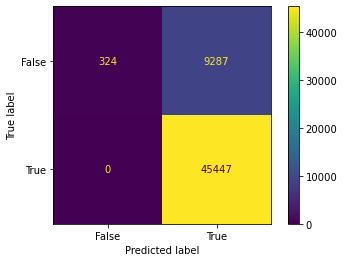

In [80]:
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                       display_labels = [False,True])
cm_display.plot()
plt.show()

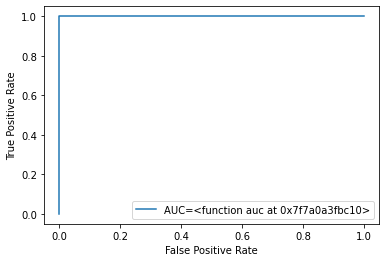

In [81]:
# define metrics
y_pred_proba = classifier_.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# create ROC curve
plt.plot(fpr,tpr,label='AUC='+str(auc))
#plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [82]:
# Random Forest Classifier with class weighting

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [83]:
param_dist = {'n_estimators': [100,200,300,500,700,800,1000],
             'criterion': ['entropy', 'gini'],
             'min_samples_split': [2,3,4,5,7,8,9,10],
             'min_samples_leaf': [1,2,3,4,5],
             'max_features': ['sqrt', 'log2'],
             'max_depth':[1,2,3,4,5,6,7],
             'random_state': [42],
             'bootstrap': [True, False],
             'class_weight': ['balanced', 'balanced_subsample']
             }

# Though not severe in any particular category, Because we are using a RandomForest
# classifier, we will address the several data imbalances in this dataset 
# with the ensemble method of StratifiedKFold
kf = StratifiedKFold()

# Create RandomizedSearchCV and find optimal hyperparameters for rfc
rs = RandomizedSearchCV(estimator=rfc, 
                        param_distributions=param_dist,
                        n_iter=100,
                        cv=kf,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=2,
                   )

In [84]:
rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7, 8,
                                                              9, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700, 800, 1000],
                  

[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=500, random_state=42; total time=  28.7s
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42; total time=   4.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, random_state=42; total time=   4.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800, random_state=42; total time= 1.0min
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, random_state=42; total time=  11.0s
[CV] END 

In [ ]:
# View the best hyperparameters
best_params = rs.best_params_
best_params

In [79]:
# View the best score
best_score = rs.best_score_
best_score

Mean ROC AUC: 0.872


In [ ]:
# View score from test set
test_set_score = rs.score(X_test, y_test)
test_set_score